In [1]:
import keras
from keras.layers import LSTM
import numpy as np

Using TensorFlow backend.


In [2]:
import data_loader as dl

In [3]:
data = dl.DataLoader()

In [4]:
X, Y, m = data.load()

In [5]:
from keras.preprocessing.sequence import pad_sequences

In [6]:
X_pad = pad_sequences(X, maxlen=m, padding='post')
Y_pad = pad_sequences(Y, maxlen=m, padding='post')

In [7]:
sample_weights = np.ones((273, m))
for i in xrange(273):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0

In [8]:
from keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Dropout
from keras.layers.wrappers import TimeDistributed

In [11]:
from keras.layers import Embedding

In [12]:
mask = np.zeros(12)
model.add(Masking(mask_value=mask, input_shape=(m, 12)))
model.add(Conv1D(100, return_sequences=True))
model.add(TimeDistributed(Dense(12, activation="softmax")))

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              sample_weight_mode='temporal')

In [15]:
X_train, X_test = X_pad[:136, :], X_pad[136:, :]

In [16]:
Y_train, Y_test = Y_pad[:136, :], Y_pad[136:, :]

In [17]:
sample_weights_train, sample_weights_test = sample_weights[:136, :], sample_weights[136:, :]

In [18]:
# # for custom metrics
import numpy as K

# def weighted_accuracy(y_true, y_pred):
#     score_array *= sample_weights
# score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))

def weighted_accuracy(y_true, y_pred):
    # Only for testing
#     score_array = K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1))
#     score_array *= weights
#     score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))
#     return K.mean(score_array)
    total = 0.0
    count = 0.0
    for i, y_i in enumerate(y_true):
        for j, y_ij in enumerate(y_i):
            if sum(y_ij) > 0:
                total += y_ij[y_pred[i][j]]
                count += 1
    return total / count

In [19]:
model.fit(X_train, Y_train, batch_size=136, nb_epoch=100, sample_weight=sample_weights_train)

Epoch 1/100
136/136 [==============================] - 48s - loss: 30.4038
Epoch 2/100
136/136 [==============================] - 40s - loss: 29.4764
Epoch 3/100
136/136 [==============================] - 38s - loss: 28.3992
Epoch 4/100
136/136 [==============================] - 39s - loss: 26.9478
Epoch 5/100
136/136 [==============================] - 35s - loss: 26.3922
Epoch 6/100
136/136 [==============================] - 45s - loss: 26.3656
Epoch 7/100
136/136 [==============================] - 89s - loss: 26.1777
Epoch 8/100
136/136 [==============================] - 106s - loss: 26.1457
Epoch 9/100
136/136 [==============================] - 37s - loss: 26.0143
Epoch 10/100
136/136 [==============================] - 39s - loss: 25.9457
Epoch 11/100
136/136 [==============================] - 39s - loss: 25.8952
Epoch 12/100
136/136 [==============================] - 38s - loss: 26.2878
Epoch 13/100
136/136 [==============================] - 39s - loss: 25.9038
Epoch 14/100
136/136

In [20]:
Y_prediction = model.predict_classes(X_test, batch_size=5)

137/137 [==============================] - 53s    


In [21]:
# Y_prediction = to_categorical(Y_prediction)
# weighted_accuracy(Y_test, Y_prediction, sample_weights_test)
weighted_accuracy(Y_test, Y_prediction)

0.4221182748488635

In [22]:
model.evaluate(X_test, Y_test, batch_size=137, sample_weight=sample_weights_test)

137/137 [==============================] - 15s


21.351690292358398

In [23]:
Y_prediction[0]

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
Y_prediction.shape

(137, 4954)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
len(model.get_weights())

14

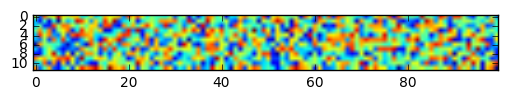

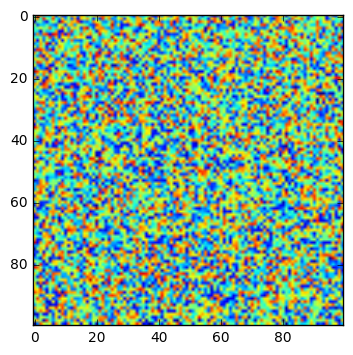

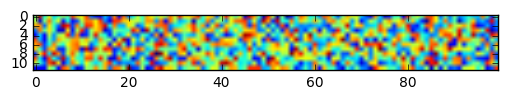

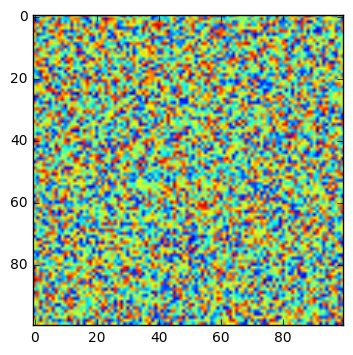

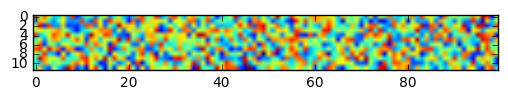

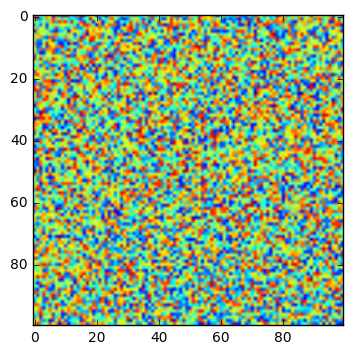

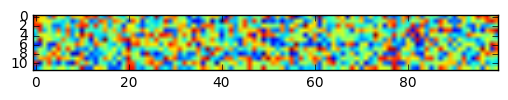

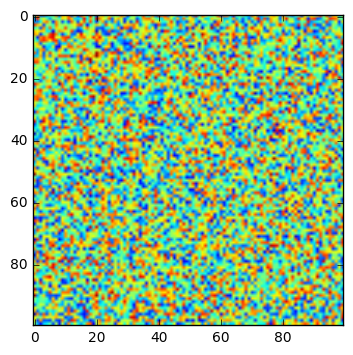

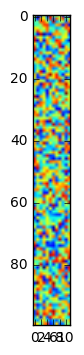

In [27]:
for w in model.get_weights():
    if len(w.shape) > 1:
        plt.figure()
        plt.imshow(w)

In [28]:
count = 0
for y in Y_prediction:
    if sum(y) > 0:
        count += 1
        print sum(y)
print count

85
37
160
202
278
22
437
691
110
249
184
70
12
107
18
40
9223
15
30
70
123
109
38
85
5
103
30
308
70
75
136
265
84
164
35
105
24000
62
57
2
268
39
20
135
181
2
60
81
263
296
353
29
60
42
128
7
38
29
4
67
20
20
20716
15
207
62
90
50
122
20
95
114
23309
65
9242
102
15
56
207
351
115
13
55
56
20
8936
67
105
44
63
209
114
107
94
111
118
9555
94
150
35
151
10
66
155
188
5
95
32
76
27
44
160
283
46
76
49
116
30
38
38
102
75
2
26
29
125
